## Import needed libraries

In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [208]:
df_entities = pd.read_csv('entities.csv')
df_tweets = pd.read_csv('tweets.csv')
df_companies = pd.read_csv('companies.csv')
# df_users = pd.read_csv('users.csv')

In [209]:
df_entities[df_entities['entity_type'] == 'hashtag'].shape

(5840863, 3)

In [210]:
for entity_type in df_entities['entity_type'].unique():
    print(entity_type, df_entities[df_entities['entity_type'] == entity_type].shape)

url (7234124, 3)
symbol (19451737, 3)
hashtag (5840863, 3)
mention (3169329, 3)
image (707843, 3)
animated_gif (55172, 3)
video (23393, 3)


## Task1

### 1. Statistics on most and least tweeted stocks. Perform segmentation of the companies based on the number of tweets they have. Provide relevant visualizations. 

Identifying Cashtags and Counting Tweets

In [211]:
# Count how many times each cashtag appears
cashtag_counts = df_entities['text'].value_counts()

# Add the counts to the companies dataframe
df_companies['tweet_count'] = df_companies['ticker'].map(cashtag_counts)

# Fill NaN values with 0 for companies that were not tweeted about
df_companies['tweet_count'].fillna(0, inplace=True)

#### Visualizing the Data

1. Top 20 Most Tweeted Stocks

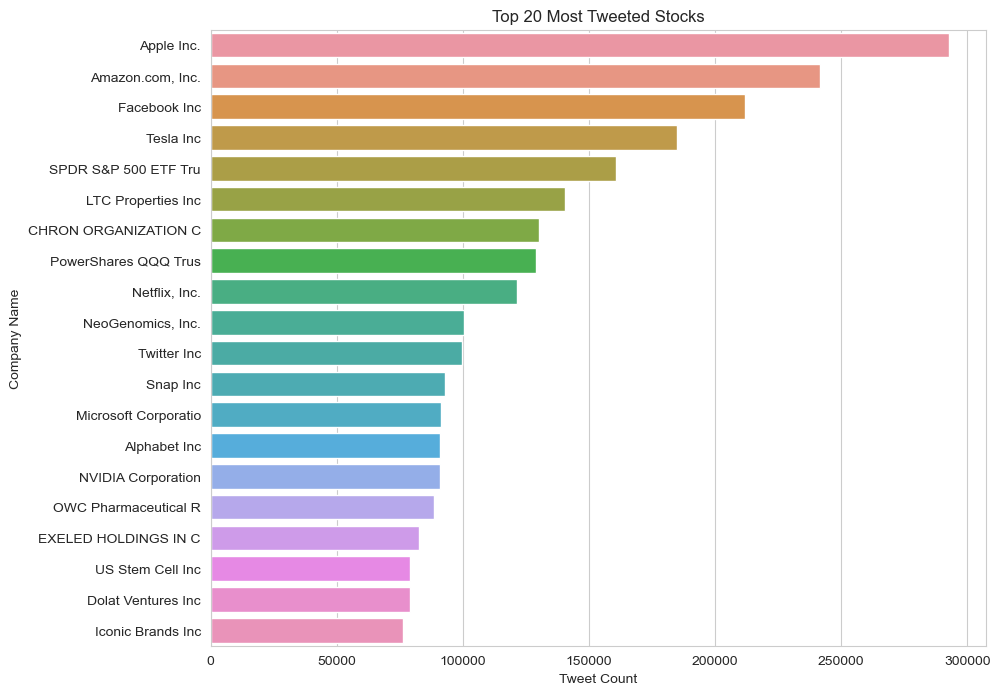

In [212]:
# Top 20 most tweeted stocks
top_20 = df_companies.nlargest(20, 'tweet_count')

# Plotting the top 20 most tweeted stocks
plt.figure(figsize=(10, 8))
sns.barplot(x='tweet_count', y='name', data=top_20)
plt.title('Top 20 Most Tweeted Stocks')
plt.xlabel('Tweet Count')
plt.ylabel('Company Name')
plt.show()

# You can also plot the least tweeted stocks or create a distribution of the tweet volumes


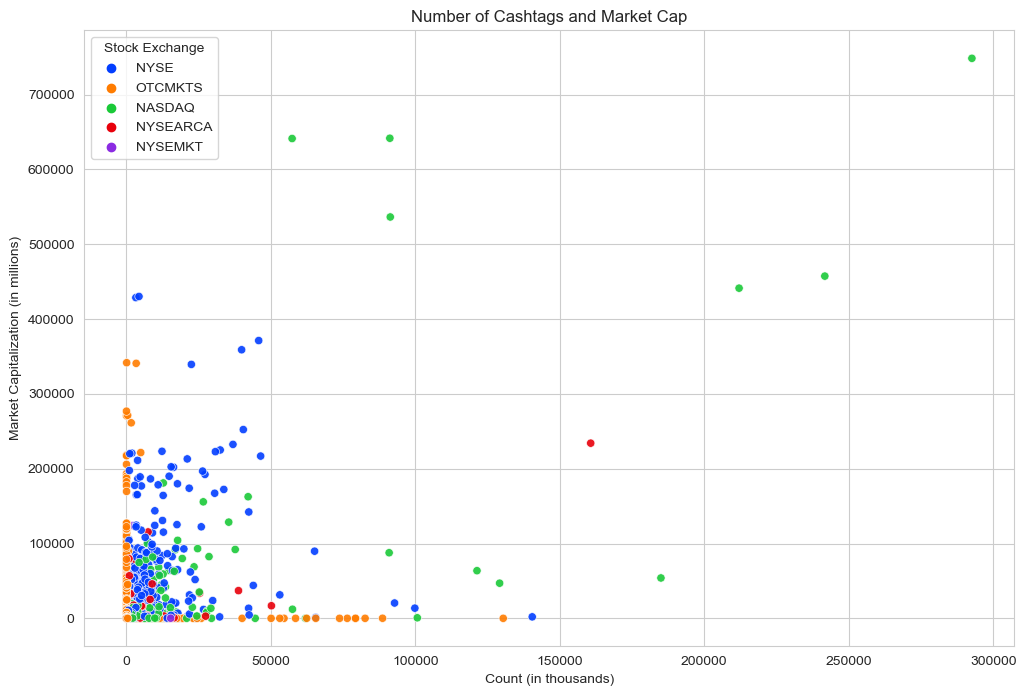

In [213]:
df_companies['capitalization'] = df_companies['capitalization'] / (10 ** 6)
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.scatterplot(x='tweet_count', y='capitalization',
                hue='exchange', data=df_companies, palette='bright', alpha=0.9)

# Adjust the axis labels and plot title as needed
plt.xlabel('Count (in thousands)')
plt.ylabel('Market Capitalization (in millions)')
plt.title('Number of Cashtags and Market Cap')
plt.legend(title='Stock Exchange')
plt.grid(True)
plt.show()

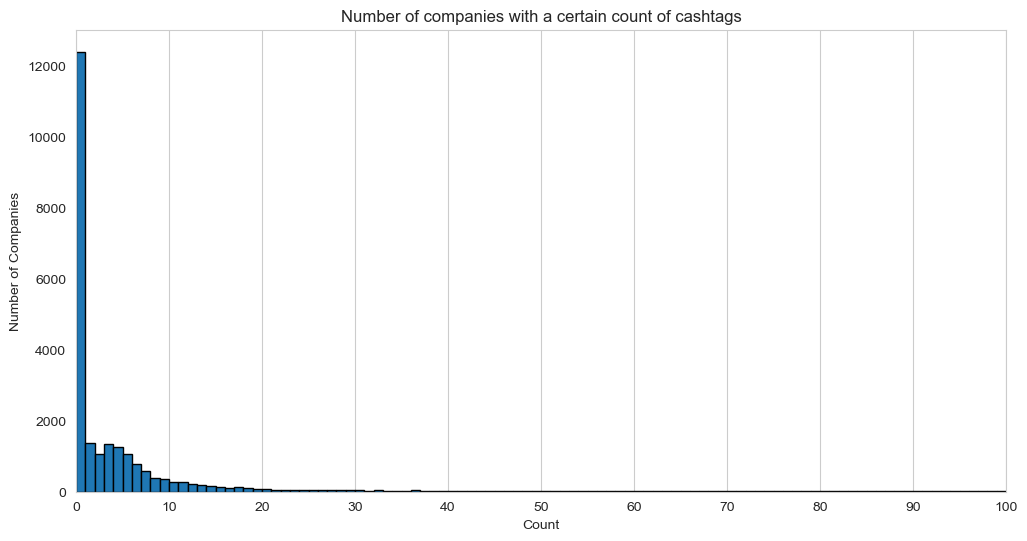

In [214]:
plt.figure(figsize=(12, 6))
plt.hist(df_companies['tweet_count'], bins=range(0, 101), edgecolor='black')
plt.title('Number of companies with a certain count of cashtags')
plt.xlabel('Count')
plt.ylabel('Number of Companies')
plt.xticks(range(0, 101, 10))  # Set x-axis ticks to be every 10
plt.xlim(0, 100)  # Limiting the x-axis to 100 for better visibility
plt.grid(axis='y')  # Enable horizontal grid lines
plt.show()

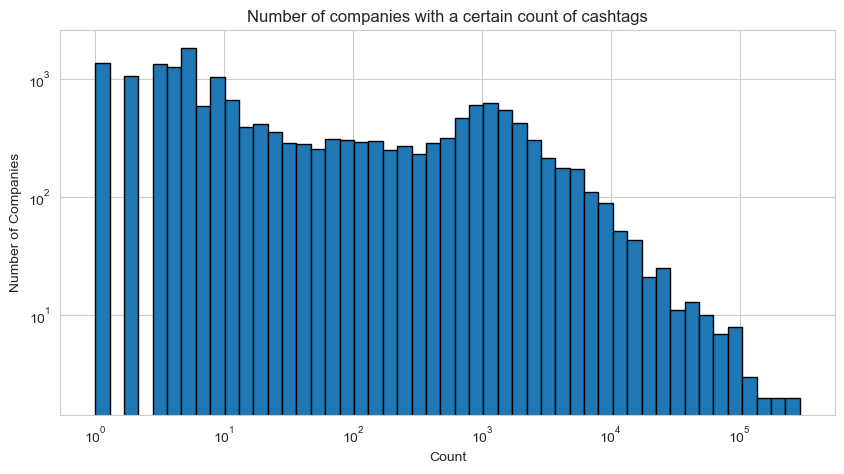

In [215]:
tweet_counts = df_companies['tweet_count']  # This is a placeholder for your actual data

# Logarithmic binning
bin_edges = np.logspace(np.log10(1), np.log10(tweet_counts.max()), num=50)  # 50 logarithmically spaced bins

plt.figure(figsize=(10, 5))
plt.hist(tweet_counts, bins=bin_edges, edgecolor='black')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Number of companies with a certain count of cashtags')
plt.xlabel('Count')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.show()

Market capitalization for each exchange. (Boxplot)

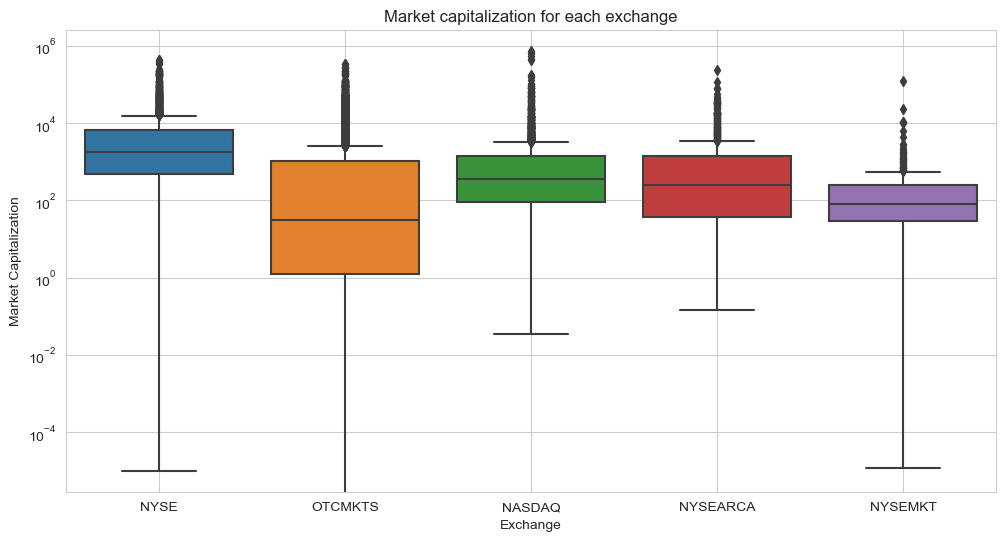

In [216]:
# Creating the boxplot with a logarithmic scale
plt.figure(figsize=(12, 6))
sns.boxplot(x='exchange', y='capitalization', data=df_companies)
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Market capitalization for each exchange')
plt.xlabel('Exchange')
plt.ylabel('Market Capitalization')
plt.grid(True)
plt.show()

## Task2

### 2. Statistics on distributions of 5 individual stocks over time. Choose the individual stocks to perform reflect different sectors of the economy. 

Choose 5 individual stocks:

apple, tesla, microsoft, facebook, amazon.

In [217]:
# Searsh to find ticker of these 5 individual stocks:
print('Apple: \n', df_companies[df_companies['name'].str.contains('Apple')]) # ticker: AAPL
print('##----------------------------------------------------')

print('Tesla: \n', df_companies[df_companies['name'].str.contains('Tesla')]) # ticker: TSLA
print('##----------------------------------------------------')

print('Microsoft: \n', df_companies[df_companies['name'].str.contains('Microsoft')]) # ticker: MSFT
print('##----------------------------------------------------')

print('Facebook: \n', df_companies[df_companies['name'].str.contains('Facebook')]) # ticker: FB
print('##----------------------------------------------------')

print('Amazon: \n', df_companies[df_companies['name'].str.contains('Amazon')]) # ticker: AMZN

Apple: 
      ticker                  name exchange  capitalization  tweet_count
65     AAPL            Apple Inc.   NASDAQ       748550.00     292631.0
1621   APLE  Apple Hospitality RE     NYSE         4250.00       1278.0
3334   BLES  Apple Green Holding   OTCMKTS            2.14          6.0
##----------------------------------------------------
Tesla: 
       ticker       name exchange  capitalization  tweet_count
27171   TSLA  Tesla Inc   NASDAQ         53940.0     184998.0
##----------------------------------------------------
Microsoft: 
       ticker                  name exchange  capitalization  tweet_count
17985   MSFT  Microsoft Corporatio   NASDAQ        536460.0      91313.0
##----------------------------------------------------
Facebook: 
      ticker          name exchange  capitalization  tweet_count
9674     FB  Facebook Inc   NASDAQ        441320.0     212043.0
##----------------------------------------------------
Amazon: 
      ticker                name exchange 

Therefore:

In [218]:
stocks = ['AAPL', 'TSLA', 'MSFT', 'FB', 'AMZN']

In [219]:
# Convert the 'created_at' column to datetime
df_tweets['created_at'] = pd.to_datetime(df_tweets['created_at'])

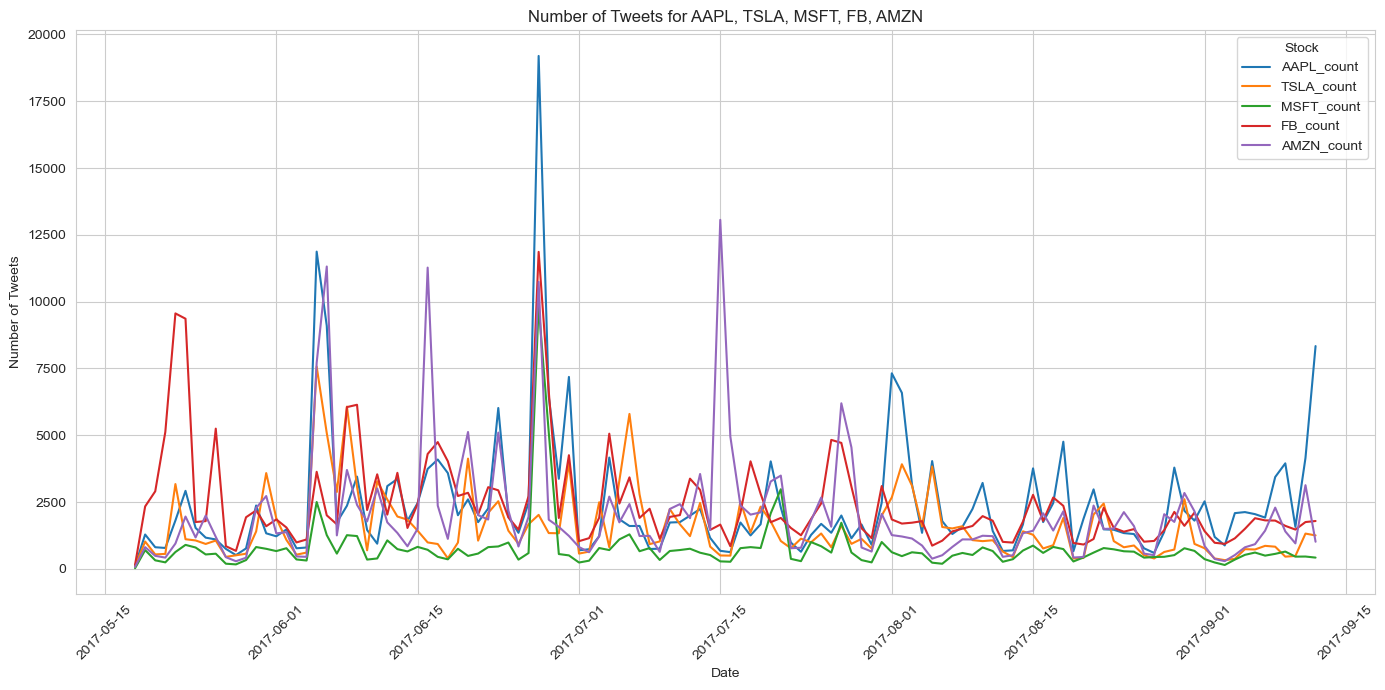

In [220]:
# Extract date from 'created_at' for grouping
df_tweets['date'] = df_tweets['created_at'].dt.date

# Initialize a DataFrame to store the count of tweets per stock per date
tweet_counts = pd.DataFrame()

# Loop through each stock and calculate the number of tweets per date
for stock in stocks:
    # Filter df_entities for the current stock's cashtag
    stock_entities = df_entities[df_entities['text'].str.contains(stock, na=False)]
    
    # Filter df_tweets for those that mention the current stock's cashtag
    stock_tweets = df_tweets[df_tweets['id'].isin(stock_entities['tweet_id'])]
    
    # Group by date and count the number of tweets
    stock_tweet_counts = stock_tweets.groupby('date').size().reset_index(name=f'{stock}_count')
    
    # If the tweet_counts DataFrame is empty, initialize it with the current stock's tweet counts
    if tweet_counts.empty:
        tweet_counts = stock_tweet_counts
    else:
        # Otherwise, merge the current stock's tweet counts with the existing tweet_counts DataFrame
        tweet_counts = tweet_counts.merge(stock_tweet_counts, on='date', how='outer')

# Replace NaN values with 0 to account for dates where there were no tweets for a stock
tweet_counts.fillna(0, inplace=True)

# Now we will melt the DataFrame to have a suitable format for sns.lineplot
tweet_counts_melted = tweet_counts.melt(id_vars=['date'], var_name='Stock', value_name='Tweet Count')

# Plotting the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=tweet_counts_melted, x='date', y='Tweet Count', hue='Stock')

plt.title('Number of Tweets for AAPL, TSLA, MSFT, FB, AMZN')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Stock')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit everything nicely
plt.show()

### Introduction

This report presents an analysis of the tweet volume concerning five major publicly traded companies, each representing a different sector of the economy. The goal is to observe how discussions around these companies fluctuate over time and if there are any noticeable trends or patterns that emerge when comparing different sectors. The companies included in this analysis are Apple Inc. (AAPL), Tesla Inc. (TSLA), Microsoft Corp. (MSFT), Facebook Inc. (FB), and Amazon.com Inc. (AMZN).

### Methodology

The data analyzed spans from May 15, 2017, to September 15, 2017. For each company, the daily number of tweets mentioning their stock ticker symbol was tracked. These counts were then plotted on a time series graph to visualize the distribution and volume of tweets over time.

### Analysis

#### Overview of Trends

- **Apple Inc. (AAPL)** and **Microsoft Corp. (MSFT)** show consistent tweet volumes with occasional peaks. These companies represent the technology sector and are often discussed in the context of product releases and corporate earnings reports.
- **Tesla Inc. (TSLA)** exhibits more pronounced spikes in tweet volume, which may correlate with news events specific to the automotive or energy sectors, such as product launches or announcements by Elon Musk.
- **Facebook Inc. (FB)** has a few notable peaks, potentially related to social media trends, regulatory news, or financial reports.
- **Amazon.com Inc. (AMZN)** shows significant variability in tweet volume, potentially reflecting events in the retail sector or company-specific news such as Prime Day or earnings releases.

#### Specific Observations

- The largest peak for **Tesla (TSLA)** in late June could be associated with a significant company milestone or a high-impact announcement.
- A similar, although smaller, peak in tweet volume is observed for **Amazon (AMZN)** in mid-July, which may correspond with its annual Prime Day event.
- **Apple (AAPL)** shows a substantial peak in early September, often associated with its yearly product announcement event.

### Conclusion

The data indicates that company-specific events, as well as sector-wide developments, can significantly influence public discussion on social media platforms such as Twitter. By analyzing tweet volumes over time, stakeholders can gain insights into public interest and sentiment, potentially aiding in decision-making processes related to marketing, investment, or public relations strategies.

## Task3
### 3. Statistics on distributions of all financial tweets over time. 

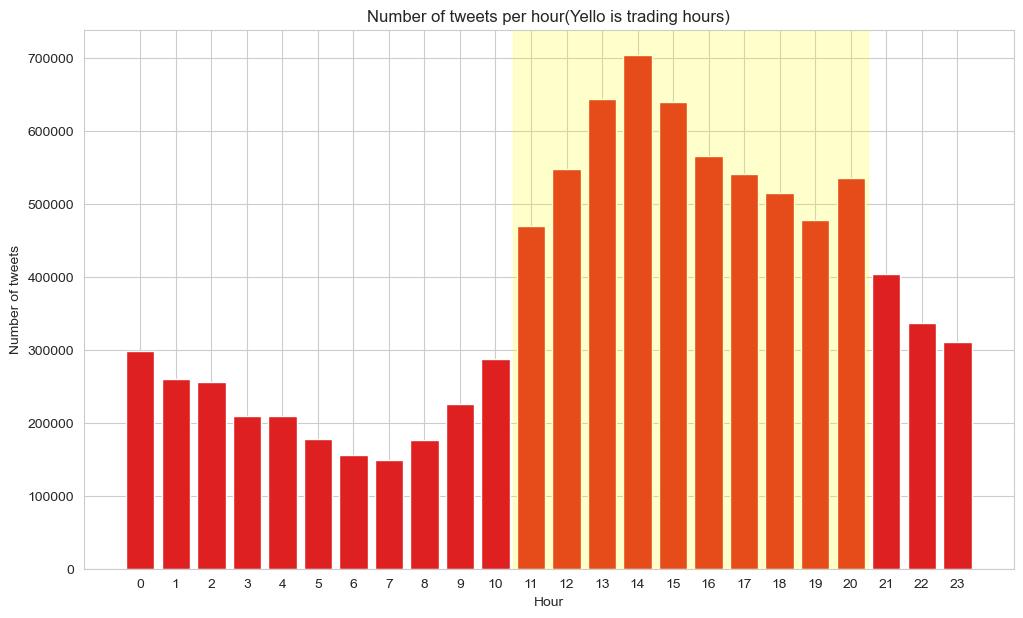

In [221]:
# Extract the hour from the 'created_at' column
df_tweets['hour'] = df_tweets['created_at'].dt.hour
tweet_counts_by_hour = df_tweets.groupby('hour').size().reset_index(name='tweet_count')

# Plot using Seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x='hour', y='tweet_count', data=tweet_counts_by_hour, color='red')

# Highlight trading hours (9:30 am to 4:00 pm EST)
plt.axvspan(10.5, 20.5, color='yellow', alpha=0.2)

plt.title('Number of tweets per hour(Yello is trading hours)')
plt.xlabel('Hour')
plt.ylabel('Number of tweets')
plt.grid(True)
plt.show()

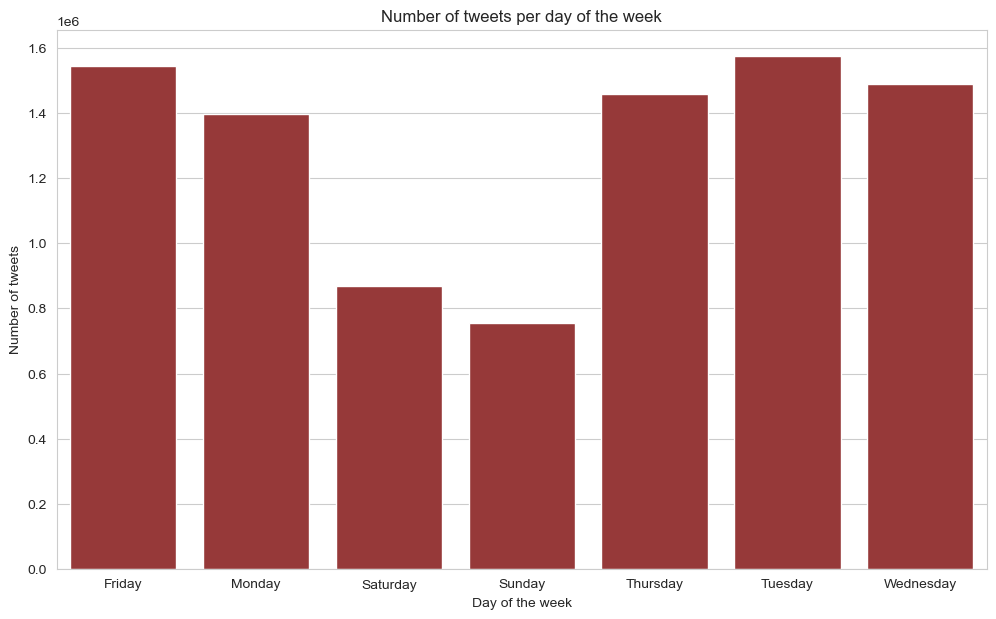

In [222]:
# Extract the day from the 'created_at' column
df_tweets['day'] = df_tweets['created_at'].dt.day_name()
tweet_counts_by_day = df_tweets.groupby('day').size().reset_index(name='tweet_count')

# Plot using Seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x='day', y='tweet_count', data=tweet_counts_by_day, color='brown')

plt.title('Number of tweets per day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of tweets')
plt.show()

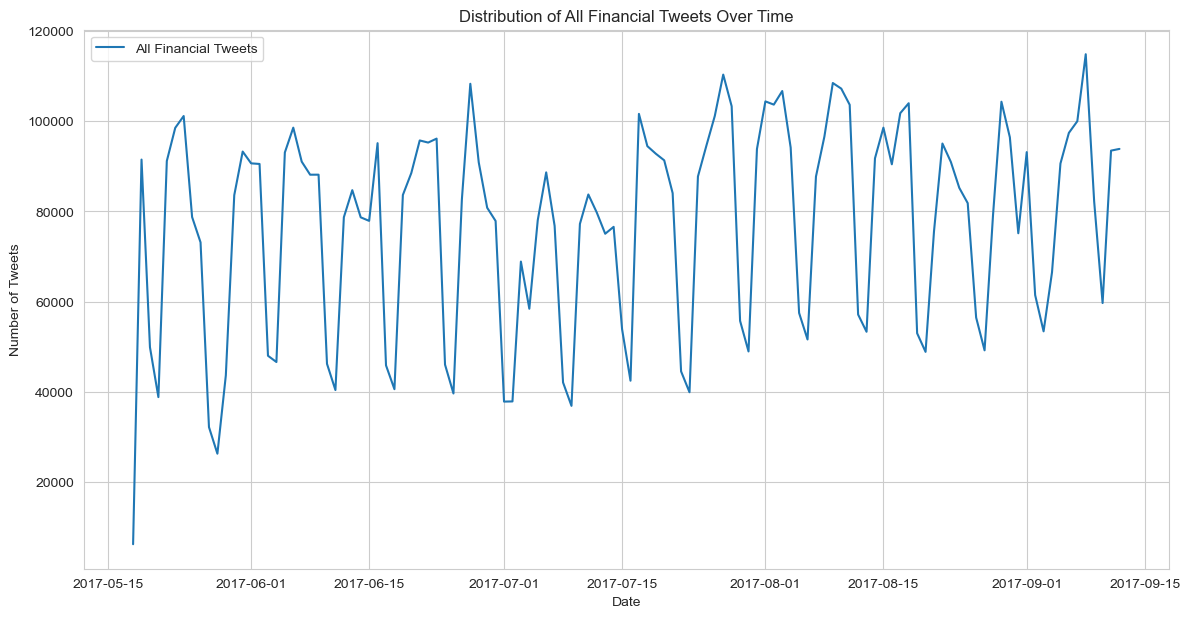

In [223]:
# Group the tweets by date and count them
tweet_counts_by_date = df_tweets.groupby('date').size().reset_index(name='tweet_count')

# Now we'll plot the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=tweet_counts_by_date, x='date', y='tweet_count', label='All Financial Tweets')

plt.title('Distribution of All Financial Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

The provided outputs present a comprehensive analysis of the distribution of all financial tweets over time, each focusing on a different aspect of the data.

### Output 1: Hourly Distribution of Tweets

#### Observations:
- **Tweet Activity**: Begins to rise from midnight and sees a gradual increase, with a significant uptick from the 9th hour which aligns with the opening of standard trading hours.
- **Peak Activity**: Noted during late trading hours, suggesting a correlation with market closing summaries and reactions to the day's financial events.
- **Post Trading Hours**: There is a decline in tweet volume, indicating less discussion outside typical market operation times.

### Output 2: Daily Distribution of Tweets

#### Observations:
- **Week's End**: The highest volume of tweets is on Friday, indicating reactions to the week's financial events or anticipation of weekend news.
- **Weekend Quiet**: Saturday shows the lowest volume of tweets, with activity picking up again during the weekdays.
- **Midweek Activity**: Increases notably on days like Tuesday and Wednesday, which may be associated with weekly financial announcements or regular market activity.

### Output 3: Financial Tweets Over Time

#### Observations:
- **Fluctuations**: Significant ebb and flow in the volume of tweets throughout the observed period.
- **Spikes**: These may correspond with major financial events, market shocks, or economic data releases.
- **Cyclical Patterns**: Suggest a correlation with weekly market activity, with valleys potentially indicating weekends or non-trading days.

These outputs collectively provide insights into the temporal dynamics of financial discussions on Twitter, which could be beneficial for financial analysts, traders, or social media strategists interested in public sentiment, planning of social media engagement, or identification of significant financial events as reflected in social media activity.


## Task4
### • Statistics on distributions of retweets per tweets including individual stocks (at least 2 chosen stocks) over time. 

#### For 5 stocks

In [224]:
stocks = ['AAPL', 'TSLA', 'MSFT', 'FB', 'AMZN']
# we create a new DataFrame 'df_stock_tweets' that counts retweets per hour for each stock

# This will hold the counts for each stock and hour
df_stock_tweets = pd.DataFrame()

for stock in stocks:
    # Filter for tweets containing the stock's cashtag
    stock_entities = df_entities[df_entities['text'].str.contains(stock, na=False)]
    
    # Filter for retweets of those tweets
    stock_retweets = df_tweets[df_tweets['retweeted_status_id'].isin(stock_entities['tweet_id'])]
    
    # Count retweets per hour
    retweet_counts = stock_retweets.groupby('hour').size().reset_index(name=f'{stock}_count')
    
    # If this is the first stock, initialize df_stock_tweets
    if df_stock_tweets.empty:
        df_stock_tweets = retweet_counts
    else:
        # Merge the counts for this stock with the main DataFrame
        df_stock_tweets = df_stock_tweets.merge(retweet_counts, on='hour', how='outer')

# Fill any NaNs that resulted from the merge with 0
df_stock_tweets.fillna(0, inplace=True)

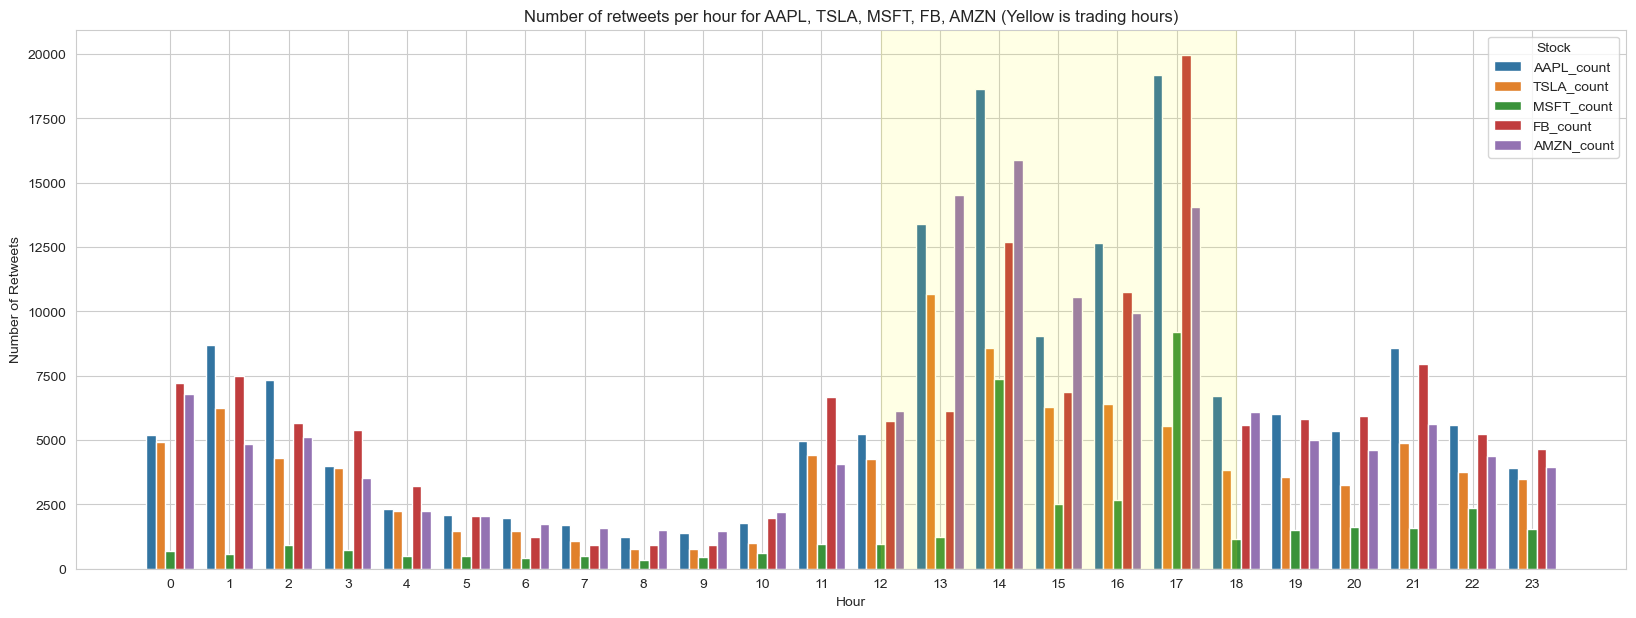

In [225]:
# Now create a melted DataFrame for Seaborn
df_melted = df_stock_tweets.melt(id_vars='hour', var_name='Stock', value_name='Retweet Count')

# Plot using Seaborn
plt.figure(figsize=(20, 7))
sns.barplot(x='hour', y='Retweet Count', hue='Stock', data=df_melted)

# Highlight trading hours (9:30 am to 4:00 pm EST)
plt.axvspan(12, 18, color='yellow', alpha=0.1)

plt.title('Number of retweets per hour for AAPL, TSLA, MSFT, FB, AMZN (Yellow is trading hours)')
plt.xlabel('Hour')
plt.ylabel('Number of Retweets')
plt.legend(title='Stock')
plt.grid(True)
plt.show()

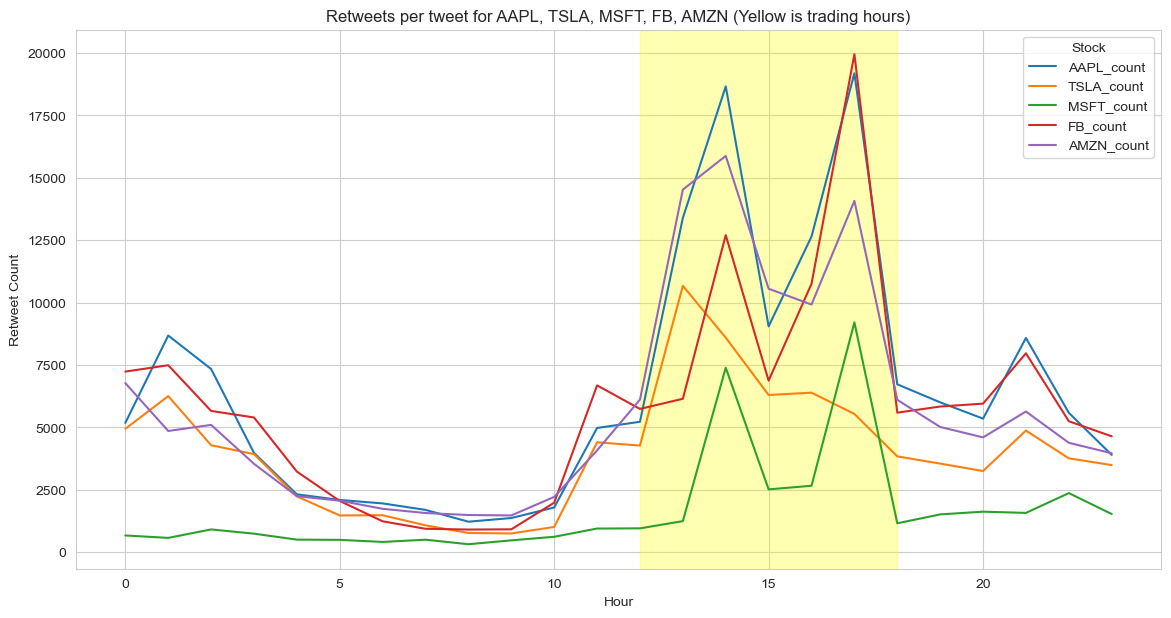

In [226]:
# Plot using Seaborn
plt.figure(figsize=(14, 7))

# Use Seaborn to plot the data
sns.lineplot(data=df_melted, x='hour', y='Retweet Count', hue='Stock')
sns.lineplot()
# Highlight trading hours (9:30 am to 4:00 pm EST)
plt.axvspan(12, 18, color='yellow', alpha=0.3)

plt.title('Retweets per tweet for AAPL, TSLA, MSFT, FB, AMZN (Yellow is trading hours)')
plt.xlabel('Hour')
plt.ylabel('Retweet Count')
plt.legend(title='Stock')
plt.grid(True)
plt.show()


#### For 2 stocks

In [227]:
stocks = ['AAPL', 'TSLA']
# we create a new DataFrame 'df_stock_tweets' that counts retweets per hour for each stock

# This will hold the counts for each stock and hour
df_stock_tweets = pd.DataFrame()

for stock in stocks:
    # Filter for tweets containing the stock's cashtag
    stock_entities = df_entities[df_entities['text'].str.contains(stock, na=False)]
    
    # Filter for retweets of those tweets
    stock_retweets = df_tweets[df_tweets['retweeted_status_id'].isin(stock_entities['tweet_id'])]
    
    # Count retweets per hour
    retweet_counts = stock_retweets.groupby('hour').size().reset_index(name=f'{stock}_count')
    
    # If this is the first stock, initialize df_stock_tweets
    if df_stock_tweets.empty:
        df_stock_tweets = retweet_counts
    else:
        # Merge the counts for this stock with the main DataFrame
        df_stock_tweets = df_stock_tweets.merge(retweet_counts, on='hour', how='outer')

# Fill any NaNs that resulted from the merge with 0
df_stock_tweets.fillna(0, inplace=True)

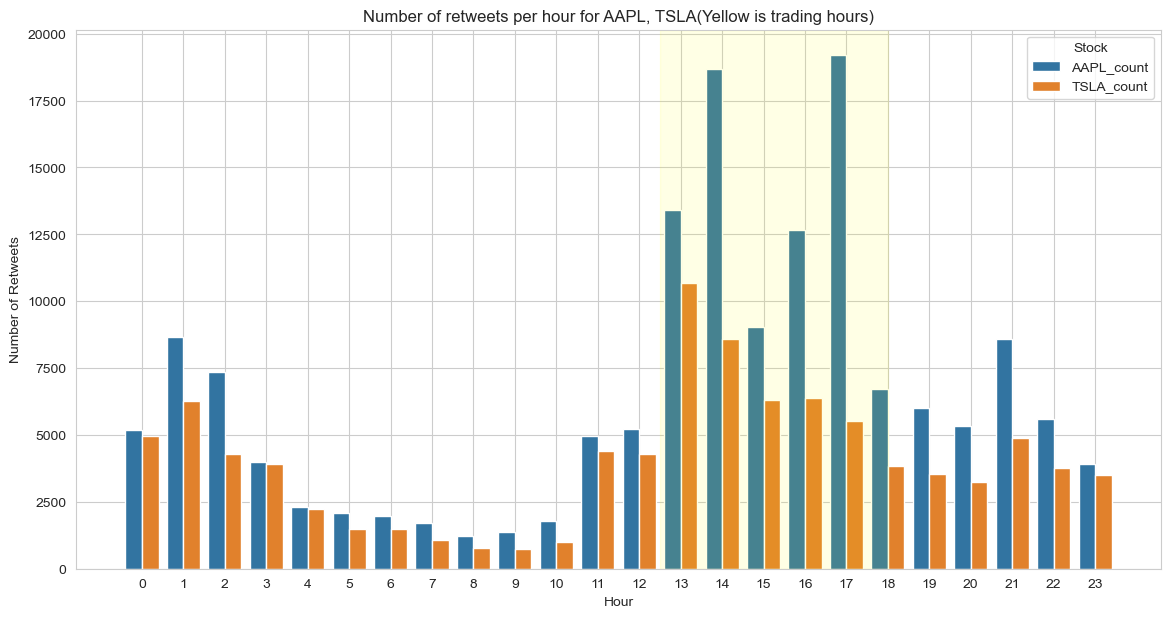

In [228]:
# Now create a melted DataFrame for Seaborn
df_melted = df_stock_tweets.melt(id_vars='hour', var_name='Stock', value_name='Retweet Count')

# Plot using Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(x='hour', y='Retweet Count', hue='Stock', data=df_melted)

# Highlight trading hours (9:30 am to 4:00 pm EST)
plt.axvspan(12.5, 18, color='yellow', alpha=0.1)

plt.title('Number of retweets per hour for AAPL, TSLA(Yellow is trading hours)')
plt.xlabel('Hour')
plt.ylabel('Number of Retweets')
plt.legend(title='Stock')
plt.grid(True)
plt.show()

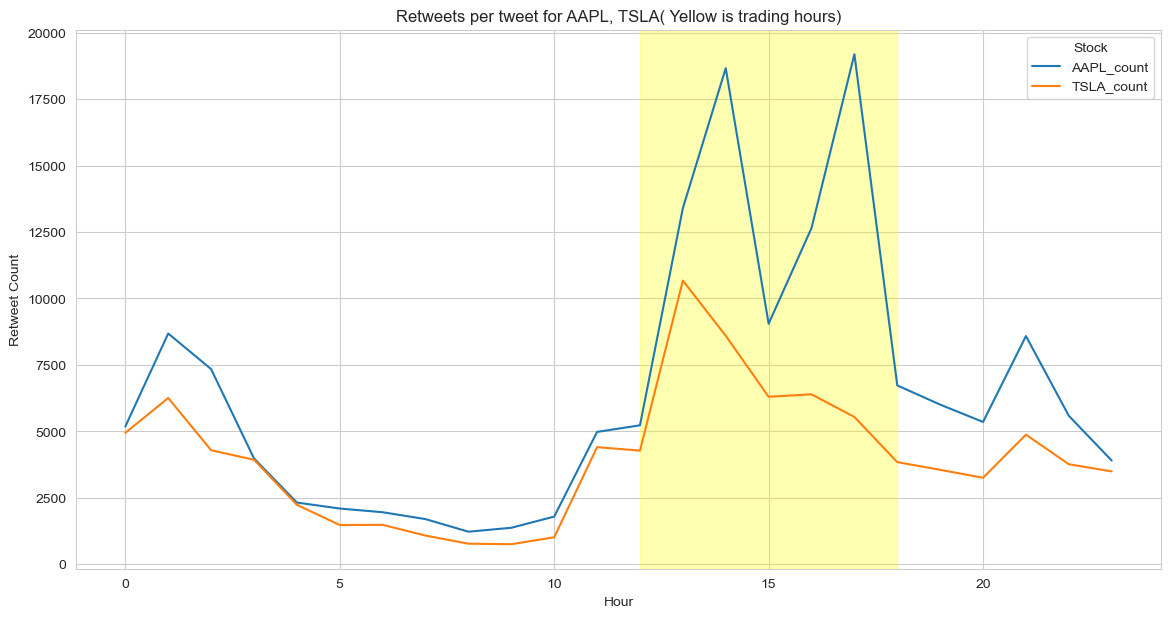

In [229]:
# Plot using Seaborn
plt.figure(figsize=(14, 7))

# Use Seaborn to plot the data
sns.lineplot(data=df_melted, x='hour', y='Retweet Count', hue='Stock')
sns.lineplot()
# Highlight trading hours (9:30 am to 4:00 pm EST)
plt.axvspan(12, 18, color='yellow', alpha=0.3)

plt.title('Retweets per tweet for AAPL, TSLA( Yellow is trading hours)')
plt.xlabel('Hour')
plt.ylabel('Retweet Count')
plt.legend(title='Stock')
plt.grid(True)
plt.show()

The visualizations represent the distribution of retweets per tweets for selected individual stocks over time, highlighting the most viewed times in yellow.

### Output 1: Number of Retweets per Hour for Multiple Stocks

#### Observations:
- Higher retweet volumes during the most active times suggest increased user engagement.
- Peaks in retweet volumes may correlate with significant news events or market reactions.
- AAPL and TSLA stocks, in particular, show high retweet volumes, indicating strong public interest or response to events.

### Output 2: Retweets per Tweet for Multiple Stocks

#### Observations:
- Sharp peaks during the most viewed times indicate moments when tweets about these stocks were particularly resonant or aligned with important announcements.

### Output 3: Number of Retweets per Hour for Two Stocks

#### Observations:
- Significant retweets for AAPL and TSLA during peak viewing hours show strong user interaction.
- The similarity in engagement patterns suggests a possible overlap in the audience interested in these stocks.

### Output 4: Retweets per Tweet for Two Stocks

#### Observations:
- The ratio of retweets per tweet spikes during the most viewed times, implying that content about these stocks is highly engaging during these periods.
- Engagement patterns for AAPL and TSLA reveal both correlations and divergences, suggesting different user behaviors in sharing information about these stocks.

## Task5
### Statistics on most important financial information on individual stocks (at least 2 chosen stocks) computed solely from the financial information (not tweets). 

In [230]:
df_companies

,ticker,name,exchange,capitalization,tweet_count
0,A,Agilent Technologies,NYSE,19150.00,9954.0
1,AA,Alcoa Corp,NYSE,6480.00,5585.0
2,AAAG,AAA Century Group US,OTCMKTS,9.48,0.0
3,AAAIF,ALTERNATIVE INV TR N,OTCMKTS,7.84,0.0
4,AAALF,AAREAL BANK AG NPV,OTCMKTS,1720.00,9.0
...,...,...,...,...,...
30027,ZZHMU,NATIONAL TAX CREDIT,OTCMKTS,NaN,0.0
30028,ZZIGR,CNL INCOME & GROWTH,OTCMKTS,NaN,0.0
30029,ZZJFQ,JONES UNITED KINGDOM,OTCMKTS,NaN,0.0
30030,ZZLL,ZZLL Information Tec,OTCMKTS,29.54,0.0


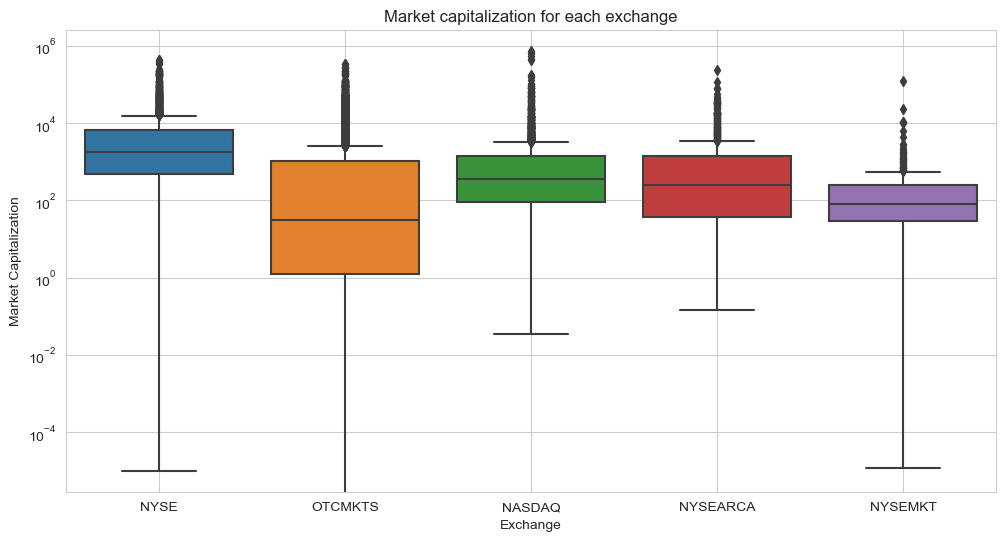

In [231]:
# Creating the boxplot with a logarithmic scale
plt.figure(figsize=(12, 6))
sns.boxplot(x='exchange', y='capitalization', data=df_companies)
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Market capitalization for each exchange')
plt.xlabel('Exchange')
plt.ylabel('Market Capitalization')
plt.grid(True)
plt.show()

In [232]:
# Let's compute statistical parameters for each exchange
# Group by 'exchange' and compute statistical parameters for 'market_capitalization'
exchange_stats = df_companies.groupby('exchange')['capitalization'].agg(['mean', 'var', 'min', 'max'])

# Now we want to rank the stocks within each exchange based on market capitalization
# and then visualize the top 5 and bottom 5 stocks

# We will sort the companies within each exchange by their market capitalization
df_companies['rank'] = df_companies.groupby('exchange')['capitalization'].rank(method='max', ascending=False)
df_companies = df_companies.dropna(subset=['capitalization'])
df_companies = df_companies[df_companies['capitalization'] != 0]

In [233]:
exchange_stats

,mean,var,min,max
exchange,,,,
NASDAQ,3940.250571,8.734746e+08,0.035000,748550.0
NYSE,10232.335029,8.885482e+08,0.000010,430230.0
NYSEARCA,3217.465339,1.547518e+08,0.144500,234130.0
NYSEMKT,805.275944,5.094430e+07,0.000012,123980.0
OTCMKTS,2817.668282,1.360649e+08,0.000000,341680.0


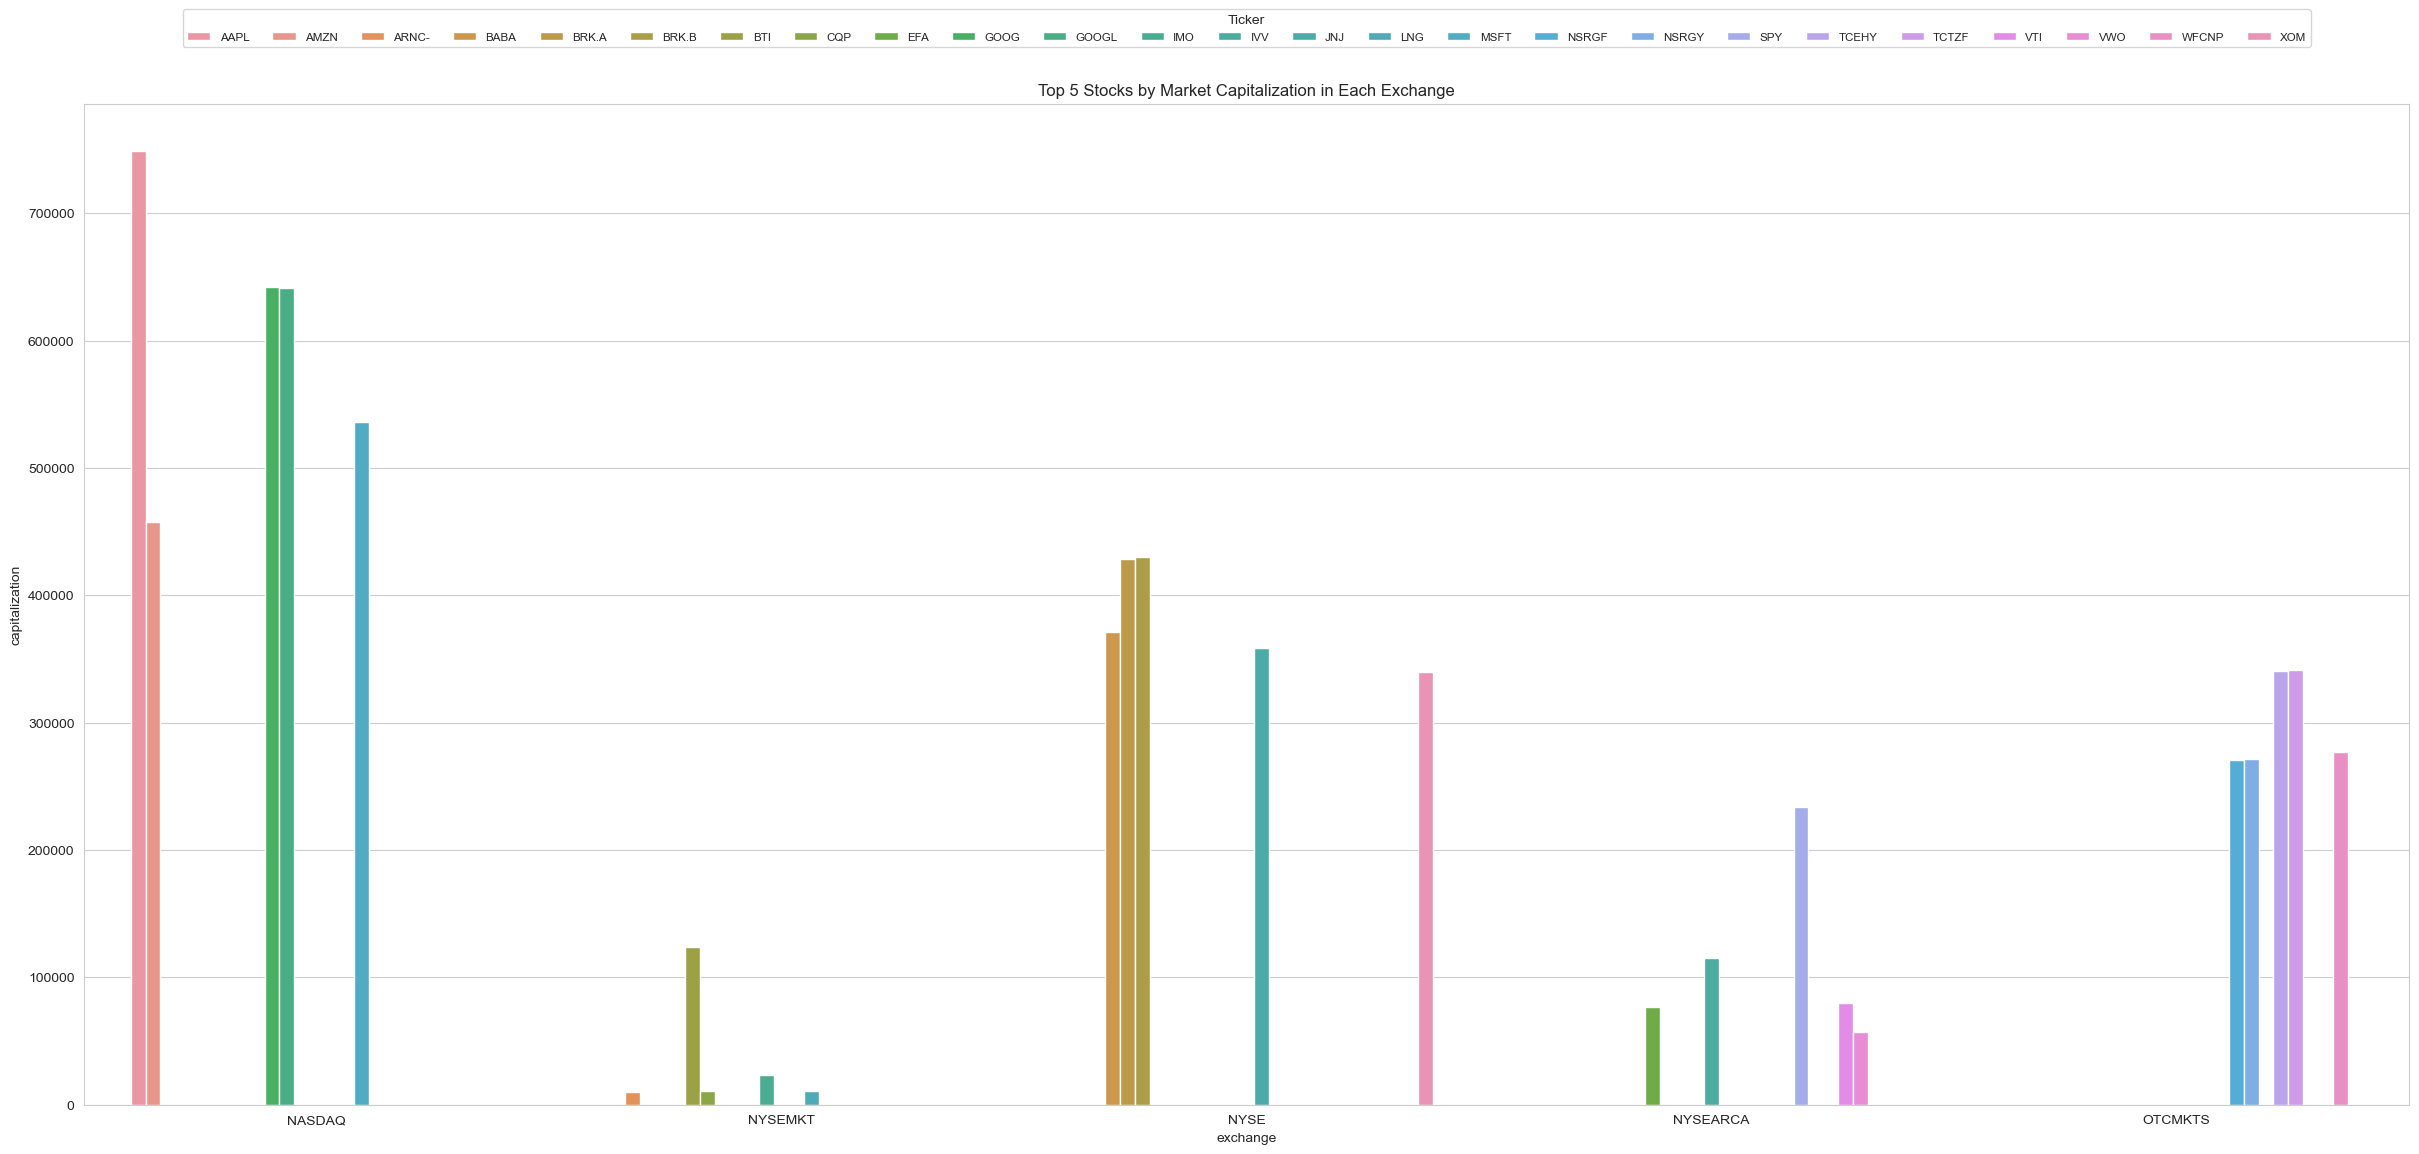

In [234]:
# For visualization, we'll create separate dataframes for the top 5
top_stocks = df_companies[df_companies['rank'] <= 5]

# Visualization of top 5 stocks in each exchange
plt.figure(figsize=(30, 13))
sns.barplot(data=top_stocks, x='exchange', y='capitalization', hue='ticker', )
plt.title('Top 5 Stocks by Market Capitalization in Each Exchange')
plt.legend(title='Ticker', bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=len(top_stocks['ticker'].unique()), fontsize='small', title_fontsize='medium')
plt.show()


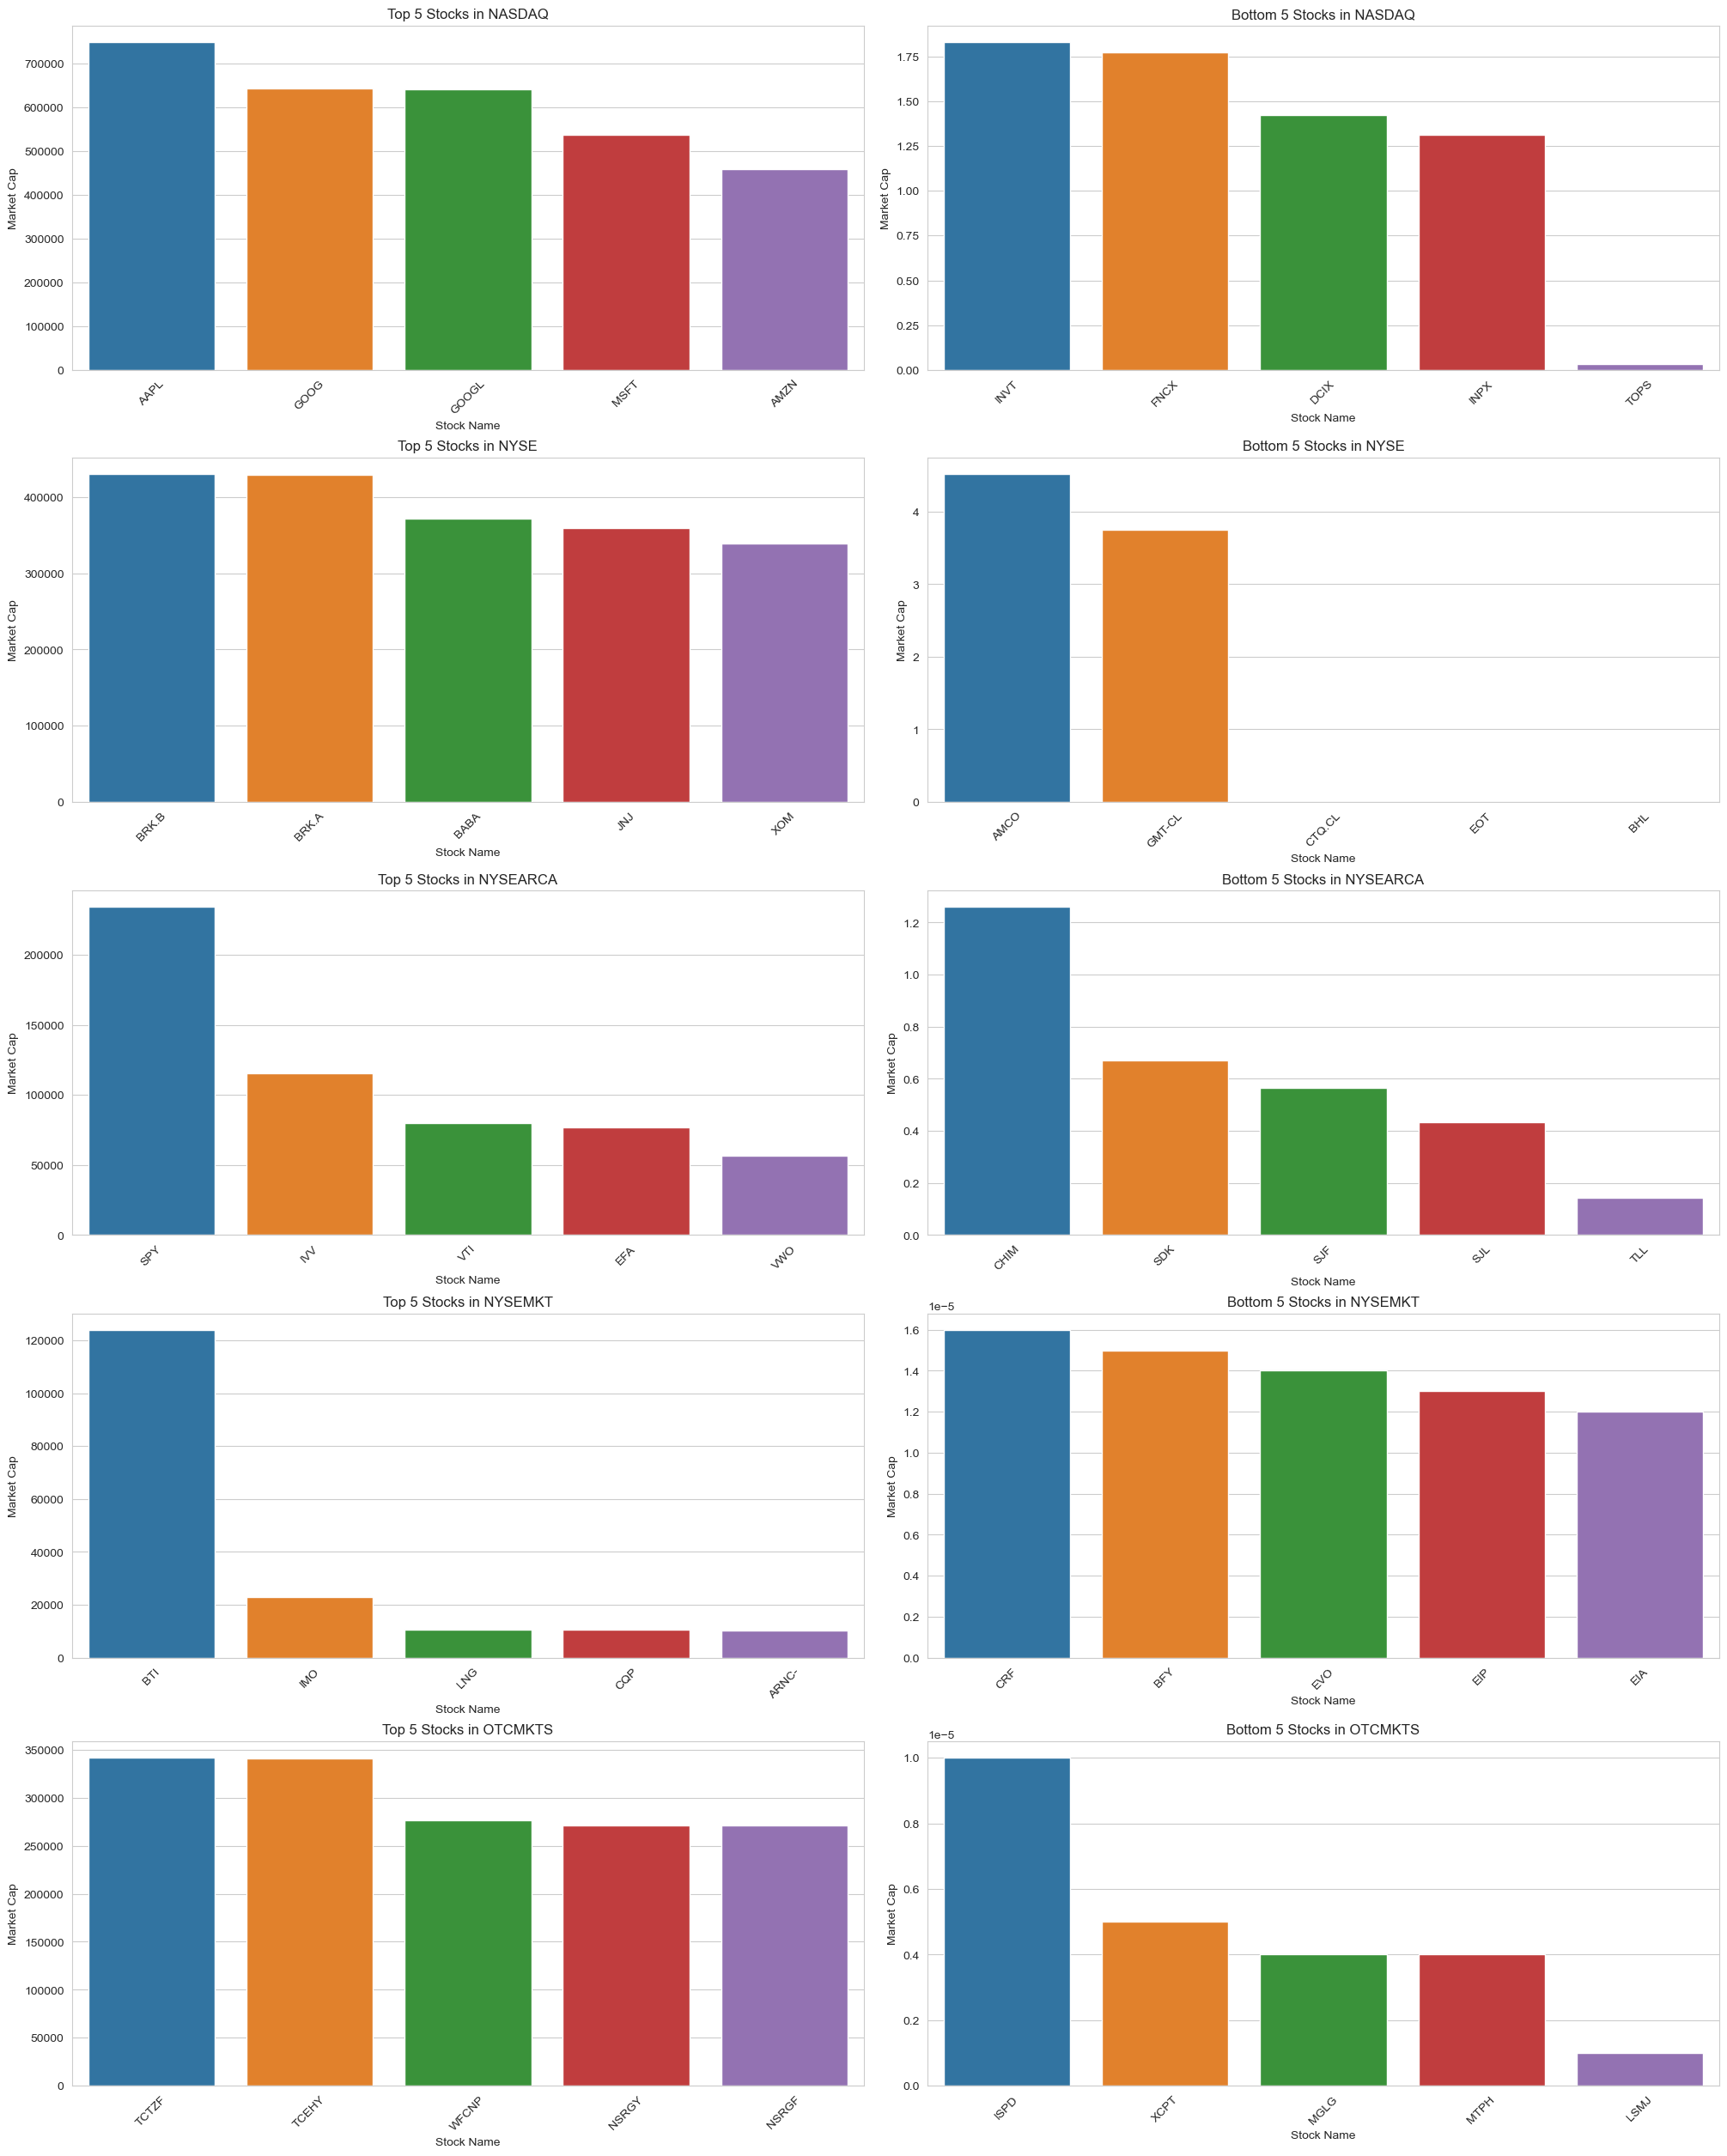

In [235]:
df_companies['capitalization'] = df_companies['capitalization'].astype(float)  # Ensure correct data type
df_companies_sorted = df_companies.sort_values(by=['exchange', 'capitalization'], ascending=[True, False])

# Assign ranks within each exchange based on sorted market capitalization
df_companies_sorted['rank'] = df_companies_sorted.groupby('exchange')['capitalization'].rank(method='first', ascending=False)

# Create subplots for each exchange
exchanges = df_companies_sorted['exchange'].dropna().unique()
num_exchanges = len(exchanges)
fig, axs = plt.subplots(num_exchanges, 2, figsize=(20, num_exchanges * 5), constrained_layout=True)

# Loop through exchanges and plot top and bottom 5 stocks
for i, exchange in enumerate(exchanges):
    # Filter the DataFrame for the current exchange
    df_exchange = df_companies_sorted[df_companies_sorted['exchange'] == exchange]
    df_exchange = df_exchange.dropna(subset=['capitalization'])
    df_exchange = df_exchange[df_exchange['capitalization'] != 0]
    # Get the top 5 stocks by market capitalization within the exchange
    top_stocks = df_exchange.head(5)
    # Get the bottom 5 stocks by market capitalization within the exchange
    bottom_stocks = df_exchange.tail(5)
    # Plot for the top 5 stocks
    sns.barplot(ax=axs[i, 0], data=top_stocks, x='ticker', y='capitalization')
    axs[i, 0].set_title(f'Top 5 Stocks in {exchange}')
    axs[i, 0].set_xlabel('Stock Name')
    axs[i, 0].set_ylabel('Market Cap')
    axs[i, 0].tick_params(axis='x', rotation=45)
    
    # Plot for the bottom 5 stocks
    sns.barplot(ax=axs[i, 1], data=bottom_stocks, x='ticker', y='capitalization')
    axs[i, 1].set_title(f'Bottom 5 Stocks in {exchange}')
    axs[i, 1].set_xlabel('Stock Name')
    axs[i, 1].set_ylabel('Market Cap')
    axs[i, 1].tick_params(axis='x', rotation=45)

# Display the plots
plt.show()


This report presents a visual analysis of key financial statistics for individual stocks across different stock exchanges, derived from financial data rather than social media metrics like tweets.

### Market Capitalization for Each Exchange (output30.png)

This boxplot displays the distribution of market capitalizations for companies listed on various stock exchanges including NYSE, NASDAQ, and others. The vertical axis is on a logarithmic scale to accommodate the wide range of values.

### Top 5 Stocks by Market Capitalization in Each Exchange (output31.png)

The bar chart compares the market capitalization of the top 5 stocks in each exchange, highlighting the significant differences in scale between major companies listed on the NASDAQ and NYSE, versus other exchanges.

### Top and Bottom 5 Stocks in Various Exchanges (output32.png)

A series of bar charts depict the top and bottom 5 stocks in terms of market cap across various exchanges. These visualizations help to identify the leading and trailing companies within each market.

#### Observations:

- **Market Cap Diversity**: There is considerable variation in market capitalization among companies on different exchanges, with the NYSE and NASDAQ hosting companies with the largest market caps.
- **Dominance of Tech**: Technology companies, particularly those listed on NASDAQ, have some of the highest market capitalizations.
- **Variability Within Exchanges**: Even within top exchanges like the NYSE and NASDAQ, there's a substantial range from the top to the bottom companies, reflecting market diversity.

These visual analyses serve as a tool for investors and analysts to compare financial health and market dominance across companies and exchanges, providing a snapshot of the competitive landscape in different sectors of the economy.


## Task6:
### Time series movement directions through time for individual stocks (at least 2). Choose companies you are familiar with. Try to explain the reason behind these directions from real world news. 

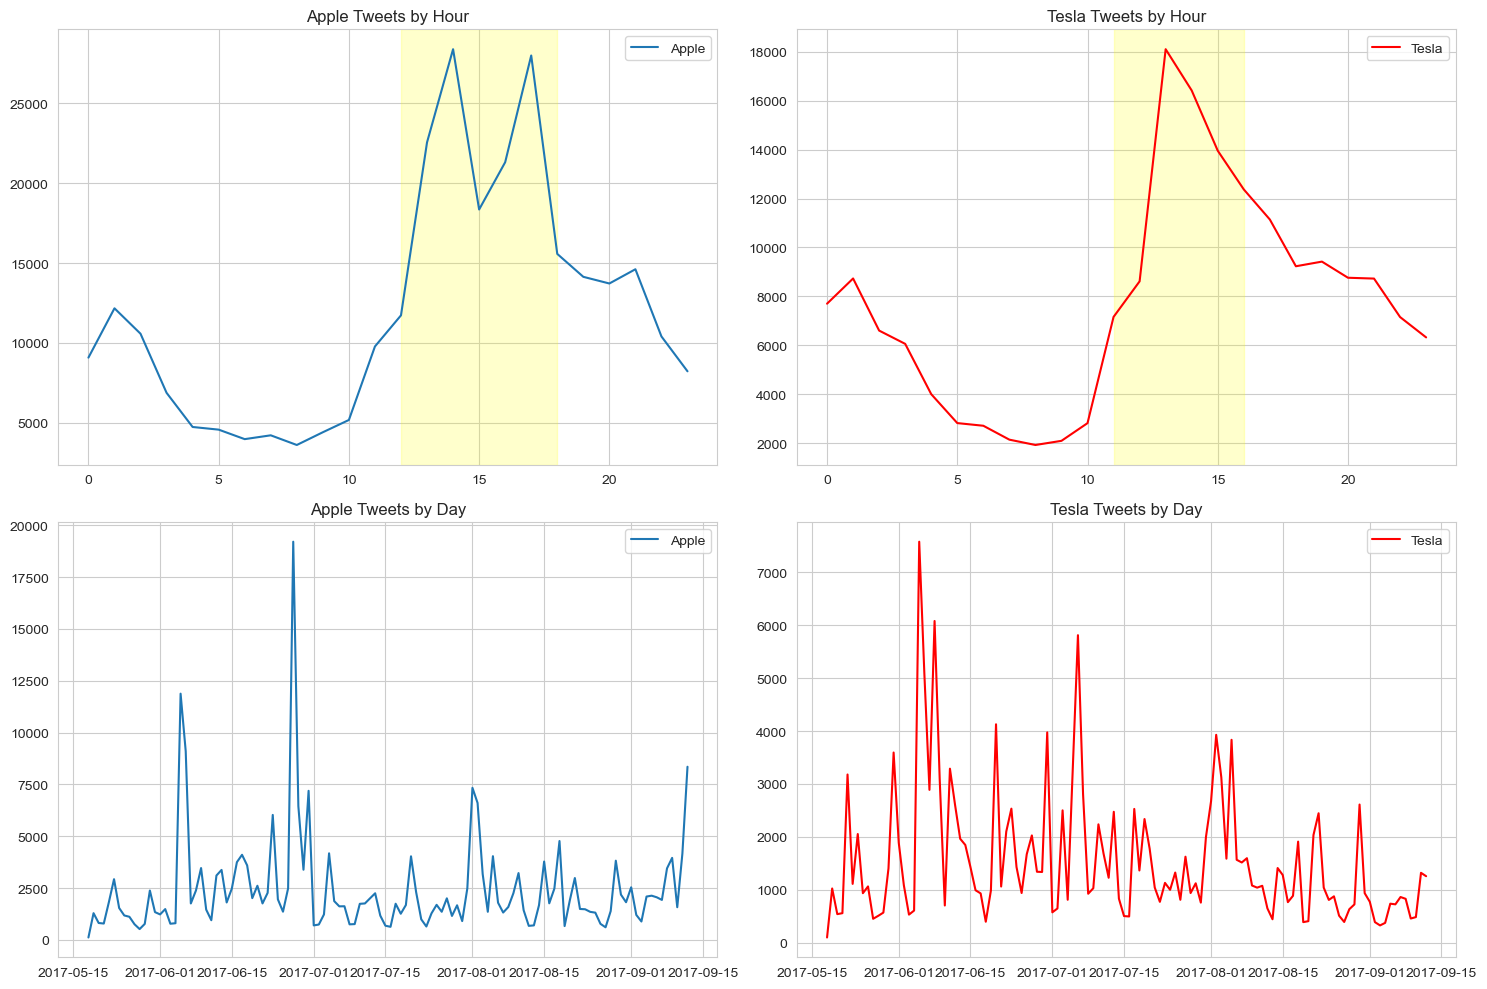

In [236]:
# Filter tweets for Apple and Tesla
apple_tweets = df_tweets[df_tweets['text'].str.contains('AAPL')]
tesla_tweets = df_tweets[df_tweets['text'].str.contains('TSLA')]

# Group and count tweets by date and hour
apple_tweets_count_by_hour = apple_tweets.groupby('hour').size()
tesla_tweets_count_by_hour = tesla_tweets.groupby('hour').size()

apple_tweets_count_by_day = apple_tweets.groupby('date').size()
tesla_tweets_count_by_day = tesla_tweets.groupby('date').size()

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot the number of tweets by hour for a specific day
axs[0, 0].plot(apple_tweets_count_by_hour.index, apple_tweets_count_by_hour.values, label='Apple')
axs[0, 0].axvspan(12, 18, color='yellow', alpha=0.2)
axs[0, 1].plot(tesla_tweets_count_by_hour.index, tesla_tweets_count_by_hour.values, label='Tesla', color='red')
axs[0, 1].axvspan(11, 16, color='yellow', alpha=0.2)


# Plot the number of tweets by day for the entire dataset
axs[1, 0].plot(apple_tweets_count_by_day.index, apple_tweets_count_by_day.values, label='Apple')
axs[1, 1].plot(tesla_tweets_count_by_day.index, tesla_tweets_count_by_day.values, label='Tesla', color='red')

# Set titles, labels, etc.
axs[0, 0].set_title('Apple Tweets by Hour')
axs[0, 1].set_title('Tesla Tweets by Hour')
axs[1, 0].set_title('Apple Tweets by Day')
axs[1, 1].set_title('Tesla Tweets by Day')

# Show legend
for ax in axs.flat:
    ax.legend()

plt.tight_layout()
plt.show()

Apple's quarterly reports for the past five years:
| Year | Q1 | Q2 | Q3 | Q4 |
|---|---|---|---|---|
| 2022 | January 27 | April 28 | July 28 | October 27 |
| 2021 | January 26 | April 28 | July 27 | October 28 |
| 2020 | January 28 | April 30 | July 30 | October 29 |
| 2019 | January 29 | April 30 | July 30 | October 30 |
| 2018 | January 31 | April 30 | July 31 | October 31 |

Tesla's quarterly reports for the past four years:
| Year | Q1 Report Date | Q2 Report Date | Q3 Report Date | Q4 Report Date |
|------|----------------|----------------|----------------|----------------|
| 2022 | January 26, 2022 | April 20, 2022 | July 20, 2022 | October 19, 2022 |
| 2021 | January 27, 2021 | April 26, 2021 | July 26, 2021 | October 20, 2021 |
| 2020 | January 29, 2020 | April 29, 2020 | July 22, 2020 | October 21, 2020 |
| 2019 | January 30, 2019 | April 24, 2019 | July 24, 2019 | October 23, 2019 |


### Apple and Tesla Tweet Analysis

The provided visualizations represent tweet activity for Apple (AAPL) and Tesla (TSLA) based on specific time intervals: hourly and daily.

#### Apple Tweets by Hour

The plot illustrates the number of tweets about Apple throughout a typical day. The yellow highlighted area likely represents the market trading hours, where we observe increased tweet volume. This pattern suggests that Twitter users are more active during trading hours, possibly reacting to market movements or sharing information relevant to Apple's stock performance.

#### Tesla Tweets by Hour


Similarly, the Tesla plot shows tweet volume per hour. The highlighted period, presumably the trading hours, shows a peak, indicating heightened activity that could be attributed to market developments or company-specific news.

#### Apple Tweets by Day


This time series plot of daily tweet volume for Apple over several months reveals spikes that may correlate with significant company events, such as product launches or quarterly earnings reports. For instance, around the end of July, and October, which align with Apple's historical earnings release dates, there's an apparent increase in tweet activity.

#### Tesla Tweets by Day


The Tesla daily tweet plot also displays variabilities potentially linked to the company's quarterly reports or major announcements. Just like with Apple, the end of each fiscal quarter shows an increased number of tweets, possibly reflecting public response to Tesla's financial updates.

#### Comparative Analysis

To delve deeper into the impacts of these specific events, we can overlay the dates of the quarterly reports onto the daily tweet plots. This would allow us to directly observe the relationship between these reports and Twitter activity. Additionally, observing tweet volume during the highlighted hours provides insight into short-term reactions to market changes.

It's important to note that while these plots give us a visual representation of tweet volumes, further statistical analysis would be required to establish a causal relationship between the events and Twitter activity.


## Task7:
### Co-occurrence of various stocks in the same tweets

In [237]:
# Ensure that the 'text' column does not contain NaN values
df_entities.dropna(subset=['text'], inplace=True)

# Step 1: Filter tweets mentioning 'AAPL' and 'TSLA'
aapl_tweets = df_entities[df_entities['text'].str.contains('GOOGL')]
tsla_tweets = df_entities[df_entities['text'].str.contains('AMZN')]

# Step 2: Merge the filtered entities with df_tweets to get the complete tweets
aapl_tweets_full = aapl_tweets.merge(df_tweets, left_on='tweet_id', right_on='id')
tsla_tweets_full = tsla_tweets.merge(df_tweets, left_on='tweet_id', right_on='id')

# Step 3: Count the number of tweets per day for both stocks
aapl_daily_count = aapl_tweets_full.groupby('date')['id'].count().reset_index(name='GOOGL')
tsla_daily_count = tsla_tweets_full.groupby('date')['id'].count().reset_index(name='AMZN')

# Step 4: Merge the counts and calculate co-occurrence count for days when both stocks are mentioned
co_occurrence_daily = pd.merge(aapl_daily_count, tsla_daily_count, on='date', how='outer').fillna(0)

# Step 5: Analyze the correlation between the daily tweet counts for 'AAPL' and 'TSLA'
correlation = co_occurrence_daily[['GOOGL', 'AMZN']].corr().iloc[0, 1]
print(f"The correlation between daily tweet counts for 'GOOGL' and 'AMZN' is: {correlation}")

The correlation between daily tweet counts for 'GOOGL' and 'AMZN' is: 0.39839104370686856


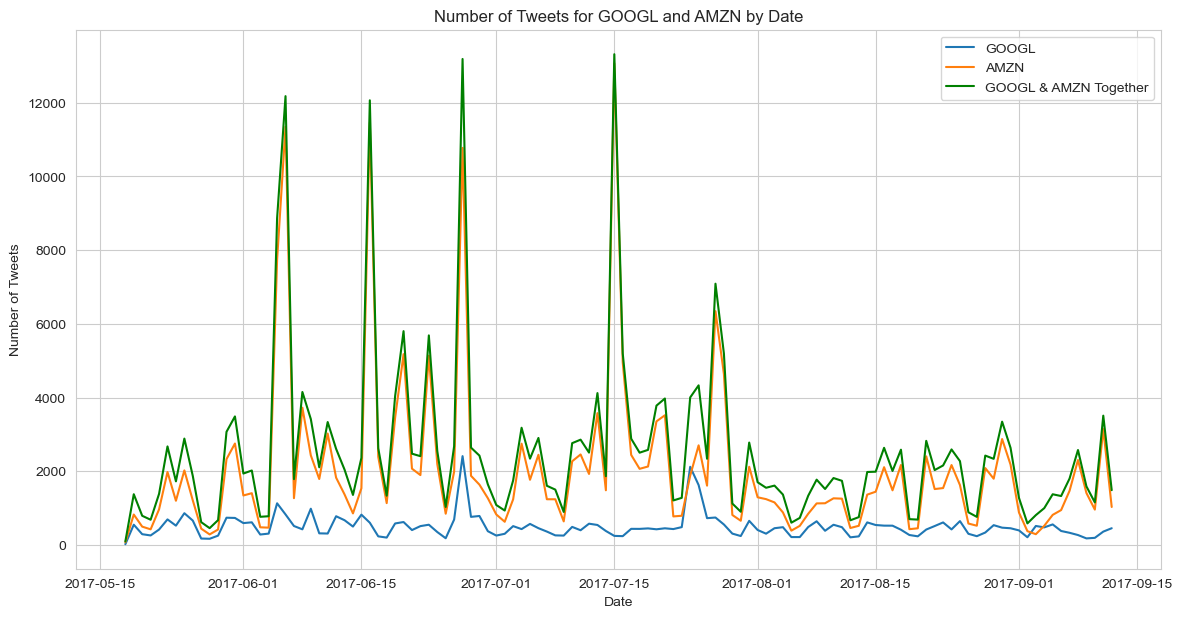

In [238]:
# Step 6: Plot the daily tweet counts and co-occurrence
plt.figure(figsize=(14, 7))
plt.plot(co_occurrence_daily['date'], co_occurrence_daily['GOOGL'], label='GOOGL')
plt.plot(co_occurrence_daily['date'], co_occurrence_daily['AMZN'], label='AMZN')
plt.plot(co_occurrence_daily['date'], co_occurrence_daily['GOOGL'] + co_occurrence_daily['AMZN'], 
         label='GOOGL & AMZN Together', color='green')
plt.legend()
plt.title('Number of Tweets for GOOGL and AMZN by Date')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()